## Guided Project: Classifying Heart Disease

In this guided project we'll be looking at a real-life dataset: the [Heart Disease Data Set](https://archive.ics.uci.edu/dataset/45/heart+disease) from the UCI Machine Learning Repository. This dataset comes from the famous Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain, to try to classify the presence of heart disease in an individual. This a prime example of how machine learning can help solve problems that have a real impact on people's lives.

## Importing Laibs 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
heart = pd.read_csv('heart_disease.csv')
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
heart.tail()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
298,299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,303,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


## Exploring the Dataset

In [4]:
## Columns 
heart.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

<p>The present column is our binary outcome of interest. 0 encodes the absence of any heart disease, while 1 encodes the presence.</p>

<p>Note: the original dataset actually has a multiclass version of the problem, based on heart disease severity. We've reduced it to a binary case for simplicity.</p>

In [5]:
heart.head

<bound method NDFrame.head of      Unnamed: 0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0             1   63    1   1       145   233    1        2      150      0   
1             2   67    1   4       160   286    0        2      108      1   
2             3   67    1   4       120   229    0        2      129      1   
3             4   37    1   3       130   250    0        0      187      0   
4             5   41    0   2       130   204    0        2      172      0   
..          ...  ...  ...  ..       ...   ...  ...      ...      ...    ...   
298         299   45    1   1       110   264    0        0      132      0   
299         300   68    1   4       144   193    1        0      141      0   
300         301   57    1   4       130   131    0        0      115      1   
301         302   57    0   2       130   236    0        2      174      0   
302         303   38    1   3       138   175    0        0      173      0   

     oldpeak  slope  

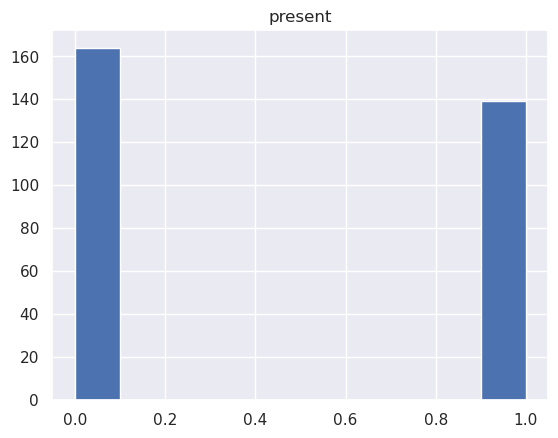

In [6]:
#checking the outcome 
sns.set(style="darkgrid")

heart.hist('present')
plt.show()

There's almost an equal number of cases and non-cases in the dataset.

In [7]:
heart.dtypes

Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca             object
thal           object
present         int64
dtype: object

In [8]:
heart['ca'] = heart['ca'][heart['ca'] != '?']
heart['thal'] = heart['thal'][heart['thal'] != '?']

heart.dropna(inplace=True)
print(heart['ca'].value_counts(dropna = False))
print(heart['thal'].value_counts(dropna = False))
heart['ca'] = heart['ca'].astype(float)
heart['thal'] = heart['thal'].astype(float)

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64
3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64


We have removed the <b>'?'</b> values in our <b>'thal'</b> and <b>'ca'</b> columns in order to clean our dataset

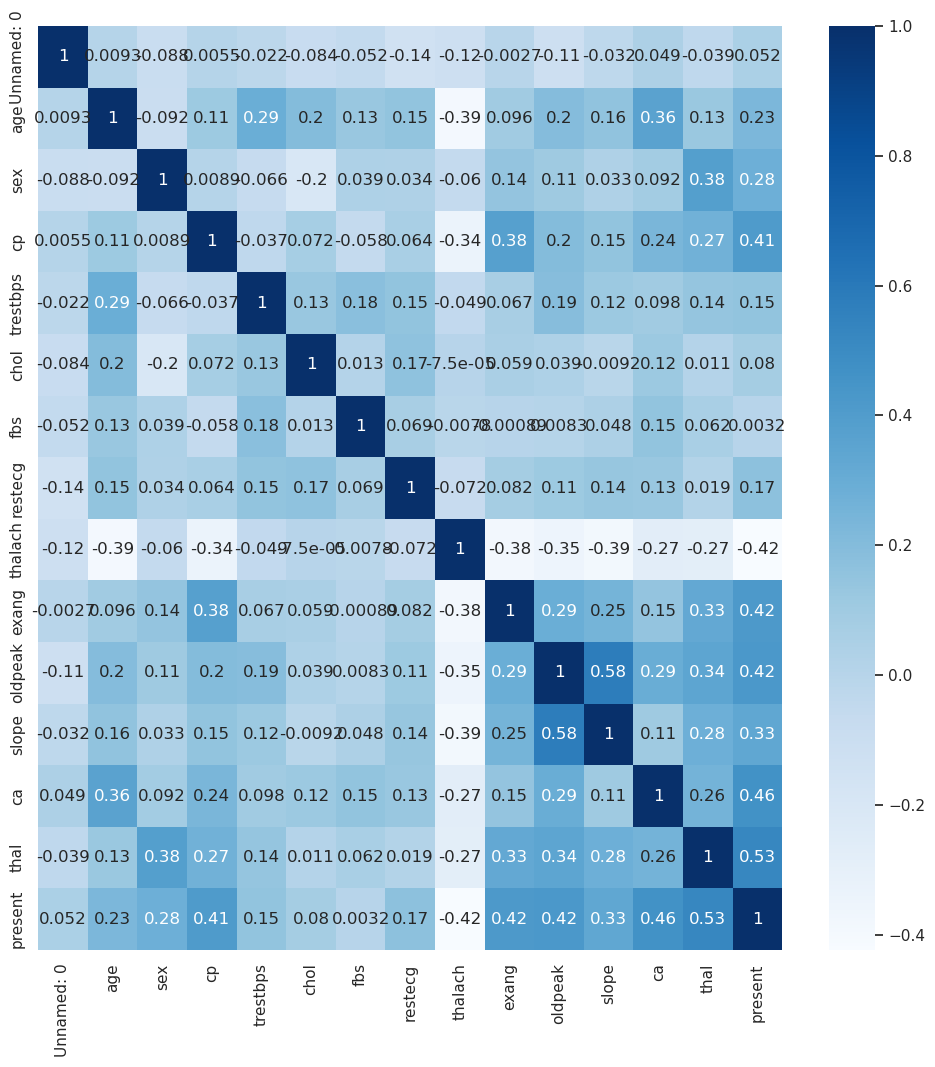

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(heart.corr(), annot=True, cmap='Blues')
plt.show()

In [10]:
heart.groupby('present').agg({'Unnamed: 0':'mean',
                              'age':'mean', 
                              'sex':'mean',
                              'cp':'mean',
                              'trestbps':'mean',
                              'chol':'mean',
                              'fbs':'mean',
                              'restecg':'mean',
                              'thalach':'mean', 
                              'exang':'mean', 
                              'oldpeak':'mean',
                              'slope':'mean',
                              'ca':'mean', 
                              'thal':'mean'})

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
present,,,,,,,,,,,,,,
0,146.487500,52.643750,0.556250,2.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500,0.275000,3.787500
1,155.562044,56.759124,0.817518,3.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818,1.145985,5.832117


<p>Some columns have a small, but noticeable difference when stratified by predictors. Based on the differences and some knowledge about heart disease, these seem like good candidates for predictors:</p>
<ul>
<li>age
<li>thalach (maximum heart rate achieved)
<li>restecg (resting ECG)
<li>ca (number of vessels colored by fluoroscopy)
<li>thal    
</ul>

## Dividing the Data

In [11]:
X = heart[['age','thalach','restecg','ca','thal']]
y = heart.present

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state=1)

In [12]:
## checking for represesntativity

print('Y_train: ',sum(y_train==1))
print('Y_train: ',sum(y_train==0))
print('Y_test: ',sum(y_test==1))
print('Y_test: ',sum(y_test==0))

Y_train:  98
Y_train:  109
Y_test:  39
Y_test:  51


We confirm above that there are both cases and non-cases in both the training and test sets

## Building the Model

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
## evaluating our model
accuracy = model.score(X_train, y_train)

y_train_pre = model.predict(X_train)

tp = sum((y_train_pre==1) & (y_train==1))
fp = sum((y_train_pre==0) & (y_train==1))
tn = sum((y_train_pre==0) & (y_train==0))
fn = sum((y_train_pre==1) & (y_train==0))

sensi = tp/(tp+fp)
speci = tn/(tn+fn)

print(f"Accuracy of our model is: {accuracy}")
print(f"Sensitivity of our model is: {sensi}")
print(f"Specificity of our model is: {speci}")

Accuracy of our model is: 0.8164251207729468
Sensitivity of our model is: 0.7959183673469388
Specificity of our model is: 0.8348623853211009


Overall the training accuracy was about 81%, the sensitivity was 79%, and the specificity was 83%. Based on these metrics, the model seems to perform better for non-cases.

## Interpreting the Model Coefficients

In [19]:
coefs = ['age','thalach','restecg','ca','thal']

for coef, val in zip(coefs, model.coef_[0]):
    print(coef ,' : ',round(val, 2))

age  :  -0.02
thalach  :  -0.03
restecg  :  0.46
ca  :  1.16
thal  :  0.56


In [20]:
coefs = ['age','thalach','restecg','ca','thal']

for coef, val in zip(coefs, model.coef_[0]):
    print(coef ,' : ',round(np.exp(val), 2))

age  :  0.98
thalach  :  0.97
restecg  :  1.59
ca  :  3.19
thal  :  1.75


<ul>
<li>Higher age and maximum heart rate (thalach) is associated with lower odds of heart disease holding the other predictors constant, but both of these odds ratios are close to 1.
<li>Resting ECG ,the number of colored vessels, and thal are associated with higher odds of heart disease holding the other predictors constant. These increases seem to be moderate and high, respectively (a 59% increase ,219(!),and 75% increase).
</ul>

##  Final Model Evaluation

In [21]:
accuracy = model.score(X_test, y_test)

y_predict_test = model.predict(X_test)

tp = sum((y_test==1) & (y_predict_test==1))
fp = sum((y_test==0) & (y_predict_test==1))
tn = sum((y_test==0) & (y_predict_test==0))
fn = sum((y_test==1) & (y_predict_test==0))

sensi = tp/(tp+fp)
speci = tn/(tn+fn)

print(f"Test Score : {accuracy}")
print(f"Sensitivity is : {sensi}")
print(f"Specificity is : {speci}")

Test Score : 0.8111111111111111
Sensitivity is : 0.7391304347826086
Specificity is : 0.8863636363636364


## Drawing Conclusions

Test accuracy was 81%, sensitivity was 73%, and specificity was 88%. Compared to the training set, the accuracy didn't change much, while the model fared better with non-cases and same with cases. This is potentially useful since this application is health-based. We might be more interested in being better at identifying cases than non-cases.